In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_histogram(data, num_bins):
    plt.hist(data, bins=num_bins, color='blue', alpha=0.7)
    plt.xlabel('z value')
    plt.ylabel('Frequency')
    plt.title('Sensor calibration errors, normalised by standard deviation')

# Load data from CSV file
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    return data

# where to save plots
overwrite = True
save_path = "/home/luke/Documents/thesis_plots/"

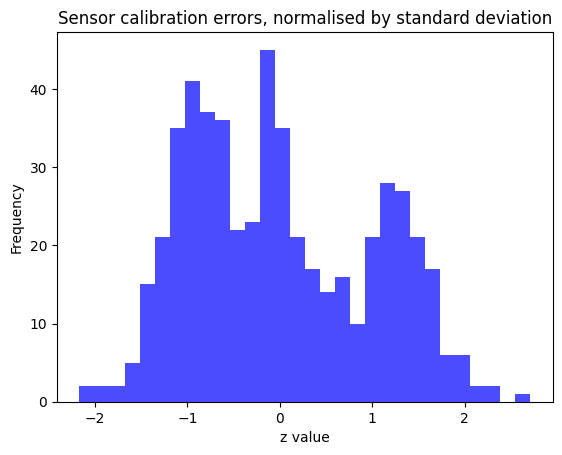

In [3]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'raw_sensor_calibrations.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_name = 'normalised'
data_to_plot = data[column_name]

# Number of bins (you can change this)
num_bins = 30

plot_histogram(data["normalised"], num_bins)
# plot_histogram(data["error / mN"], num_bins)

plt.gcf()
if False and overwrite: plt.savefig(save_path + "calibration_errors_distribution.png")
plt.show()

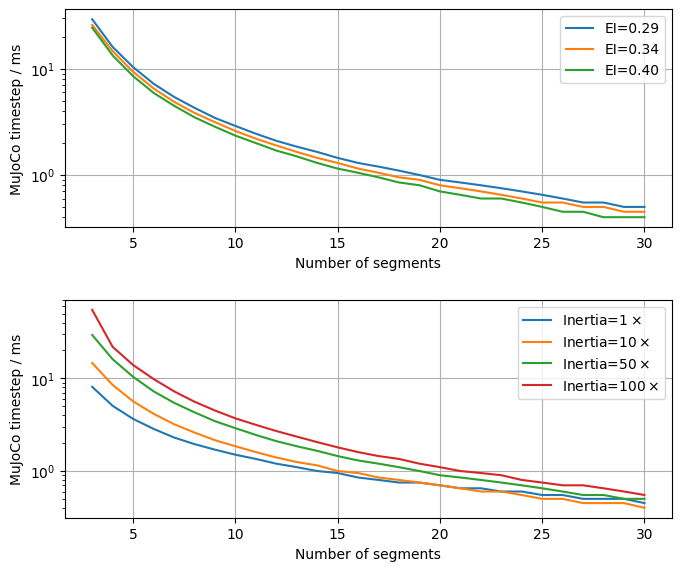

In [4]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'mujoco_timesteps.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)
segments = list(range(3, 31))

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_names = [
  "t=0.9, w=28.0, inertia=1",
  "t=0.9, w=28.0, inertia=10",
  "t=0.9, w=28.0, inertia=50",
  "t=0.9, w=28.0, inertia=100",
  "t=1.0, w=24.0, inertia=1",
  "t=1.0, w=24.0, inertia=10",
  "t=1.0, w=24.0, inertia=50",
  "t=1.0, w=24.0, inertia=100",
  "t=1.0, w=28.0, inertia=1",
  "t=1.0, w=28.0, inertia=10",
  "t=1.0, w=28.0, inertia=50",
  "t=1.0, w=28.0, inertia=100",
]

data_indexes_to_plot = [
  [2, 6, 10],
  [0, 1, 2, 3],
]
legends = [
  ["EI=0.29", "EI=0.34", "EI=0.40"],
  [r"Inertia=$1\times$", r"Inertia=$10\times$", r"Inertia=$50\times$", r"Inertia=$100\times$"],
]

plot_relative = False

fig, axs = plt.subplots(2 + plot_relative, 1, sharex=False)

for i in range(len(data_indexes_to_plot)):
  for j in range(len(data_indexes_to_plot[i])):
    axs[i].plot(segments, data[column_names[data_indexes_to_plot[i][j]]])
  axs[i].legend(legends[i])
  axs[i].set_ylabel("MuJoCo timestep / ms")
  axs[i].set_xlabel("Number of segments")
  axs[i].set_yscale("log")
  axs[i].grid()

# now plot the relative change for the inertias
if len(axs) == 3:
  timesteps = [np.array(data[column_names[data_indexes_to_plot[1][j]]]) for j in range(len(data_indexes_to_plot[1]))]
  relative = np.array([np.divide(timesteps[i + 1], timesteps[0]) for i in range(len(data_indexes_to_plot[1]) - 1)])
  axs[2].plot(segments, [1 for i in range(len(segments))], "--")
  for i in range(len(relative)):
    axs[2].plot(np.array(segments), relative[i])
  axs[2].legend(legends[1][:])
  axs[2].grid()
  axs[2].set_ylim(ymin=0)
  axs[2].set_xlabel("Number of segments")
  axs[2].set_ylabel(r"Relative speed up vs $1\times$ inertia")
  Ns = 8
  print(f"Speed up factor at N = {Ns} is [{relative[0][Ns-3]:.2f}, {relative[1][Ns-3]:.2f}, {relative[2][Ns-3]:.2f}]") # -3 as N starts at 3

fig.tight_layout()
fig.set_size_inches(7, 3 * len(axs))
if False and overwrite: fig.savefig(save_path + "mujoco_timesteps.png")

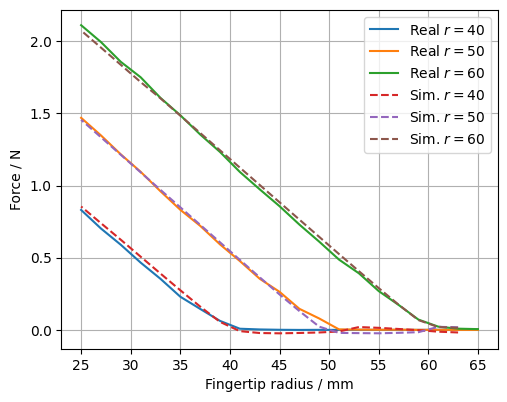

In [54]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'EI2_sim_vs_real_forces_edited.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)
segments = list(range(3, 31))

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_names = [
  "XY pos", # 0 
  "Real 160", # 1 
  "Real 120", # 2 
  "Real 100", # 3 
  "Real 80", # 4  
  "Sim 160", # 5  
  "Sim 150", # 6  
  "Sim 120", # 7
  "Sim 110", # 8  
  "Sim 100", # 9
  "Sim 90", # 10 
  "Sim 80", # 11
  "Sim 70", # 12  
]

data_indexes_to_plot = [
  [0],
  [4, 3, 2],
  [12, 10, 8],
  # [11, 9, 7]
]
legends = [r"Real $r=40$", r"Real $r=50$", r"Real $r=60$",
           r"Sim. $r=40$", r"Sim. $r=50$", r"Sim. $r=60$"]

data_np = []
for i in range(len(column_names)):
  data_np.append(np.array(data[column_names[i]]))

fig, axs = plt.subplots(1, 1, sharex=False)

for i in range(len(data_indexes_to_plot[1])):
  axs.plot(data_np[data_indexes_to_plot[0][0]] - 35, data_np[data_indexes_to_plot[1][i]])

for i in range(len(data_indexes_to_plot[1])):
  # axs.plot(data_np[data_indexes_to_plot[0][0]] - 35, data_np[data_indexes_to_plot[2][i]], "--")
  axs.plot(data_np[data_indexes_to_plot[0][0]][:-1] - 37, data_np[data_indexes_to_plot[2][i]][:-1], "--")

axs.legend(legends)
axs.set_ylabel("Force / N")
axs.set_xlabel("Fingertip radius / mm")
axs.grid()

fig.tight_layout()
fig.set_size_inches(5, 4)
if False and overwrite: fig.savefig(save_path + "sim_vs_real_forces.png")